## Introduction

In this notebook, let us learn to code a quantum algorithm to find the largest of two given integers. Be it positive or negative integer, this algorithm will do fine. 

Let us see the basic overview of the algorithm we've used in the next section. In those appropriate sections, we can dig deep into the concepts and the methods used!


## Algo Overview

The boiler plate of this whole algorithm is simple **Binary Addition**. To perform this binary addition we are using **Quantum Fourier Transform (QFT)**, which can be installed as a package from **Qiskit**.

## Principle Behind the Algorithm

We will negate the first integer and add it with the second integer, if the resulting integer is negative, the first integer is the largest and if the resulting integer is positive, the second integer is the largest.

## Steps

1. Get the input integers as parameters to the function ***find_the_largest_number (int:number_1, int ,number_2)***

2. Multiply the first integer to ***'-1'*** to make it negative and use this in place of the first integer. Now, convert both these integers to its corresponding *binary* format. For negative integers, use **2's Complement** method to find its corresponding binary. 

3. Introduce two quantum registers to store the binaries of the two input integers and one classical register to store the output of binary addition.

4. Now encode the inputs to the quantum registers. Consider there are n qubits in the resister, if the kth bit of the input is '1', then add an **X gate** to the (n-k)th qubit of the register.

5. Now add a QFT block across all the qubits of the first input register. This will transform all the qubits from states $|0\rangle$ and $|1\rangle$ to $|{+}\rangle$ state.

6. Next, perform controlled rotations on the qubits of the first register, by adding a **CPhase gate** across the qubits of first reg and second reg, in such a way that nth bit of the first reg is connected to first n qubits of the second reg.

7. Now apply **Inverse Quantum Fourier Transform (IQFT)** across all the qubits of the first register. This will bring back all the qubits to the required $|0\rangle$ and $|1\rangle$ states.

8. Thus, the first quantum register will now contain the result of binary addition of the two registers. We can now measure this register to the classical register. Now, the classical register contains the solution we needed. 

9. The corresponding solution will also be in Two's complement format. So, the negative integer will contain a leading **'1'** in their binary and for positive integer, the vice versa. 

10. So, if the classical register contain a leading **'1'**, the integer in the first argument is the largest and if the classical register contain a leading **'0'**, the integer in the second argument is the largest.

## With all these basic ideas in mind, let us jump hands on into the code !!


## Importing packages

For this project, we are using ***Qiskit***. Qiskit is an open-source Software Development Kit from IBM, which allows us to work on quantum computers or even simulate the quantum computers to test our algos and applications that run on quantum computers. For more info, [here][1] is the link for documentation.

We are also using the ***Numpy*** package, the most used library in python, used for array manipulations and complex mathematical calculations involving expressions and constants. For more info, [here][2] is the link for documentation.

Below are the packages, we are importing from **Qiskit**

- **[QuantumCircuit][3] :** This package allows us to build the quantum circuit, along with the quantum gates involved.

- **[Aer][4] :** This package is the simulator for quantum computer, we will use 'qasm_simulator' backend from the Aer package to run and test our circuits.

- **[execute][5] :** This package will help us assemble the circuit which we have have created using **QuantumCircuit** onto the quantum simulator.

- **[QuantumRegister][6] :** This package will ease us working on a collection of qubits considering them as a register.

- **[ClassicalRegister][7] :** This package will ease us working on a collection of classical bits considering them as a register.

- **[QFT][8] :** This is a module from *qiskit.circuit.library*, which allows us to perform quantum fourier and inverse fourier transform on quantum registers or on specific qubits.

[1]: <https://qiskit.org/> "Qiskit doc"
[2]: <https://numpy.org/doc/stable/user/index.html#user> "Numpy doc"
[3]: <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html> "QuantumCircuit doc"
[4]: <https://qiskit.org/documentation/stubs/qiskit_aer.AerSimulator.html> "AerSimulator doc"
[5]: <https://qiskit.org/documentation/stable/0.24/_modules/qiskit/execute.html> "execute doc"
[6]: <https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumRegister.html> "QuantumRegister doc"
[7]: <https://qiskit.org/documentation/stubs/qiskit.circuit.ClassicalRegister.html> "ClassicalRegister doc"
[8]: <https://qiskit.org/documentation/stable/0.24/stubs/qiskit.circuit.library.QFT.html> "QFT doc"

In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

In [2]:
# Let us check the installed version of the Qiskit

qiskit.__version__

'0.22.2'

## Binary Conversion

Considering the positive integers the binary representation is quite straightforward. But, for negative integers there are actually three methods to represent as binary - *Signed magnitude*, *1's complement* and *2's complement*. You can learn more about these representations from [here][1].

From these, the widely accepted method is **2's complement method**. 

The two's complement of any negative number, (For eg: -5) can be calculated as follows :

- Consider the absolute value of the number (5)
- Subtract it by 1 (5-1=4)
- Find the binary of that subtracted number (0100)
- Take complement of that binary (1011)
- This is the two's complement binary representation of the number (-5)

This is the method which is used for binary representation in modern processors. There are many reasons for adopting this method. One main reason is that, after conversion, we can use direct binary addition to compute the sum of two integers, even for negative integers. For instance consider addition of two integers

```
-5+4=-1
```

Their corresponding binary is 

```
 1011
+0100
=?
```
Applying binary addition, we get

```
 1011
+0100
=1111
```

'1111' is the two's complement representation of -1

For more inclined minds. [Here][2] is the PDF, which I referred to for this tutorial.

### Let us now implemant a function to do this

[1]: <https://www.geeksforgeeks.org/representation-of-negative-binary-numbers/> "Binary Representation"
[2]: <https://www.cs.ou.edu/~fagg/classes/ame3623_s10/lecture/class_arithmetic.pdf> "Binary Addition PDF"



In [3]:
def twos_complement(number, num_bits):
    
    '''
    This function returns the two's complement binary string representation of the first input argument.
    For positive integers, it would return the direct binary representation
    
    args :
    
    number(int) -> This is the input integer for which the binary representation has to be found
    
    num_bits(int) -> Number of bits the return binary should be in
    
    return:
    
    binary(string) -> Binary equivalent of the input number of length num_bits
    '''
    
    if number >= 0: # Checks if the number is positive
        binary = format(number, f'0{num_bits}b')
    else: 
        # Compute the absolute value of number and subtract it from 2^bits
        abs_num = abs(number)
        complement = (1 << num_bits) - abs_num
        binary = format(complement, f'0{num_bits}b')

    return binary

In [4]:
# Let us check our function

print(twos_complement(-5,4))
print(twos_complement(-76,8))

1011
10110100


## Binary Conversion of input integers

In [5]:
# Let us declare two integers, for which we will be finding the largest in the upcoming cells

int_1 = 2
int_2 = -3

In [6]:
# Determine the number of qubits needed based on the larger number

n = max(len(bin(int_1)), len(bin(int_2))) # This will consider two extra bits for '0b' We will be needing those two bits, to check for +ve or -ve integers

In [7]:
# Convert those two integers in their corresponding 2's complement format

bin_int1 = twos_complement(int_1, n)
bin_int2 = twos_complement(int_2, n)

print(bin_int1)
print(bin_int2)

00010
11101


## Define Quantum circuits 

In [8]:
# Declaring two quantum registers containing qubits same as the number of bits in the input binary string
# And one classical register which also contains bits same as the number of bits in the input binary string 

qReg_a = QuantumRegister(n, 'a')
qReg_b = QuantumRegister(n, 'b')
cReg = ClassicalRegister(n, 'c')

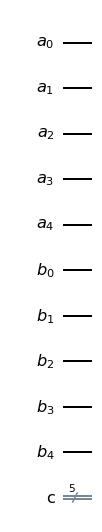

In [9]:
# Initializing the quantum circuit with the registers declared above
qc = QuantumCircuit(qReg_a, qReg_b, cReg)

# Dispaly the circuit created so far
qc.draw()

## Encoding Inputs

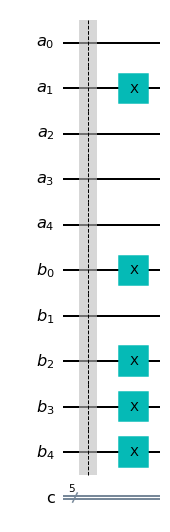

In [10]:
qc.barrier()

# Now let us encode the input bits into the corresponding register
for index in range(n):
        
    rev_index = n - index - 1 # Iterating the index backwards
    
    # Place an X gate in the corresponding (n-index)th qubit if the corresponding nth bit is 1 
    if (bin_int1[index]=='1'):
        qc.x(qReg_a[rev_index])
        
    if (bin_int2[index]=='1'):
        qc.x(qReg_b[rev_index])
        
        
# Dispaly the circuit created so far
qc.draw()

## Performing Quantum Fourier Transform

In [11]:
def controlled_rotations(qc, qra, qrb, k) :
    '''
    This function performs controlled rotations by connecting kth qubit of the first quantum register 
    to the first k qubits of the second register, by means of a controlled-phase gate, which will change the base phase
    to multiples of pi/2 based on the iteration
    
    args :
    
        qc -> QuantumCircuit object
        qra -> QuantumRegister Object
        qrb -> QuantumRegister Object
        k  -> int
    
    return :
    
        None
    '''
    for i in range(0, k+1):
        # change the base phase by ith multiple of pi/2 if the control qubit from regB is 1
        qc.cp(np.pi/2**i, qrb[k-i], qra[k]) 


## Note on QFT

In general, the use case of Fourier and Inverse Fourier Transform is enmasse. It is used in various fields like signal processing, image processing, biotechnology, etc. In quantum computing, we use QFT, to transform the state of the qubits from $|0\rangle$ and $|1\rangle$ states to $|{+}\rangle$ state.

In this state, the vector lies along the X-Y plane, where we can rotate as we like in the X-Y plane, using the **Controlled-Phase gate**. In this particular case for binary addition, as the control bit encounters one, it will shift the phase vector in the multiples of 90 degrees.

After this step, we use Inverse QFT to bring back the qubits from $|{+}\rangle$ state to $|0\rangle$ and $|1\rangle$ states, which gives us the solution for binary addition.


### Below is an illustration of qubits before applying Fourier Transform


![zbasiscounting](images/zbasis-counting.gif)


### After applying Fourier Transform


![fbasiscounting](images/fourierbasis-counting.gif)

[Image References][3]

For mathematically inclined dudes, [here][1] is the tutorial on ***Binary Addition using QFT***, which I used as a reference.

For people who need a strong understanding on the general **Fourier Transform**, I recommend you to watch this [tutorial][2]. I even would recommed this tutorial to everyone, as its the best tutorial on FT, I've ever seen.

[1]: <https://arxiv.org/pdf/quant-ph/0008033.pdf> "Binary addition using QFT"
[2]: <https://youtu.be/spUNpyF58BY> "Fourier Transform Tutorial"
[3]: <https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html> "Qubit Image References"

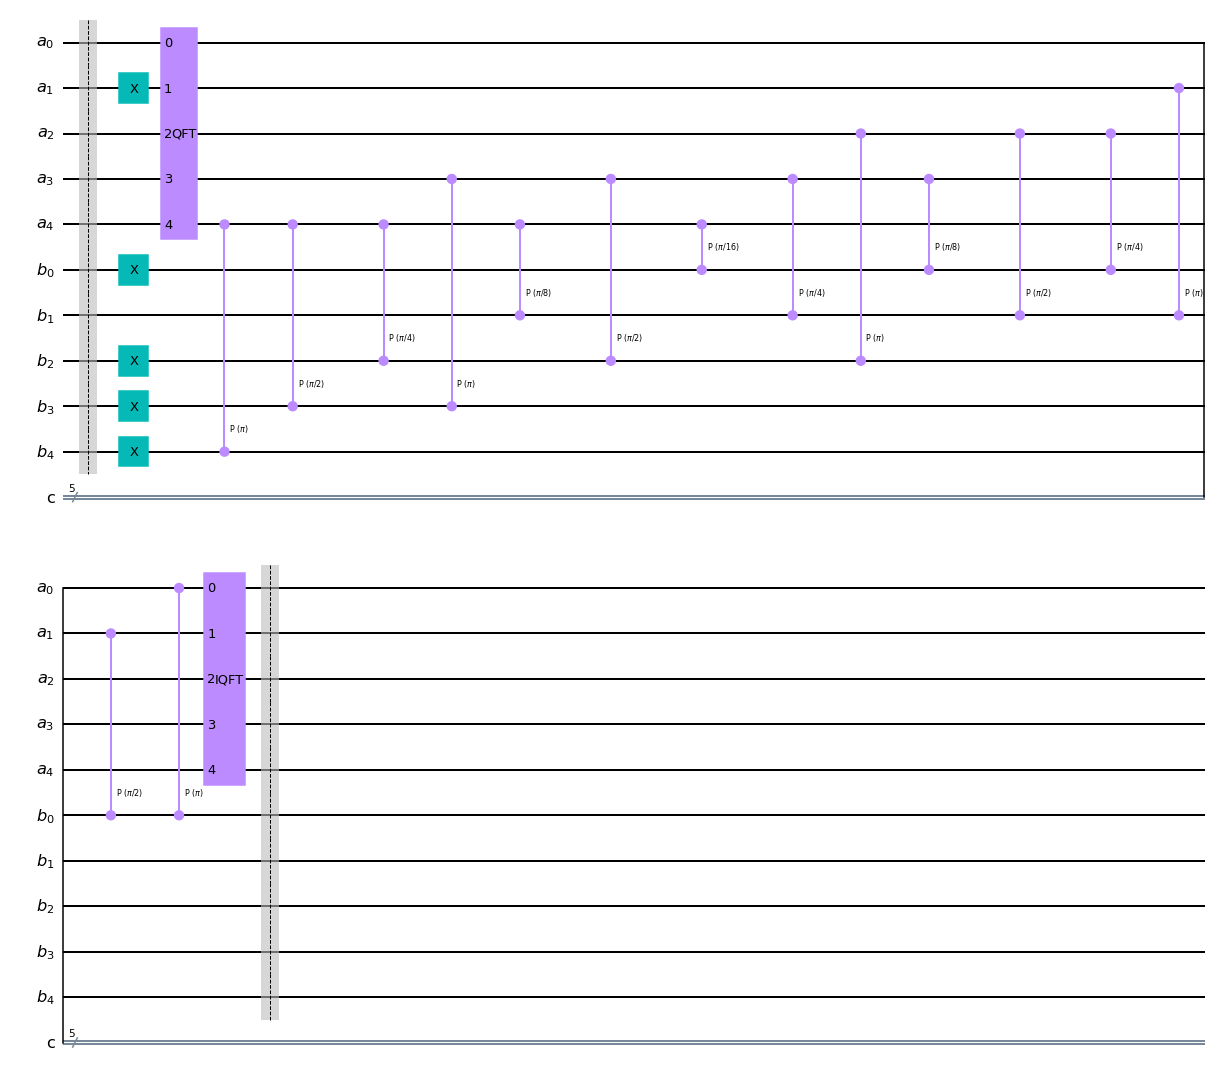

In [12]:
# Adding a QFT block across all the qubits of the first quantum register
qc.append(QFT(n, do_swaps=False), [i for i in range(n)])
    
for i in range(n):
    # This function will add C-Phase gate on all of the qubits of qReg_a    
    controlled_rotations(qc, qReg_a, qReg_b, n-i-1 )

# Adding an inverse QFT block across all the qubits of the first quantum register        
qc.append(QFT(n, do_swaps=False).inverse(), [i for i in range(n)])

# Adding a graphical barrier to show the end of circuit manipulation
qc.barrier()

# Display the circuit created so far
qc.draw()

## Measuring the qubits

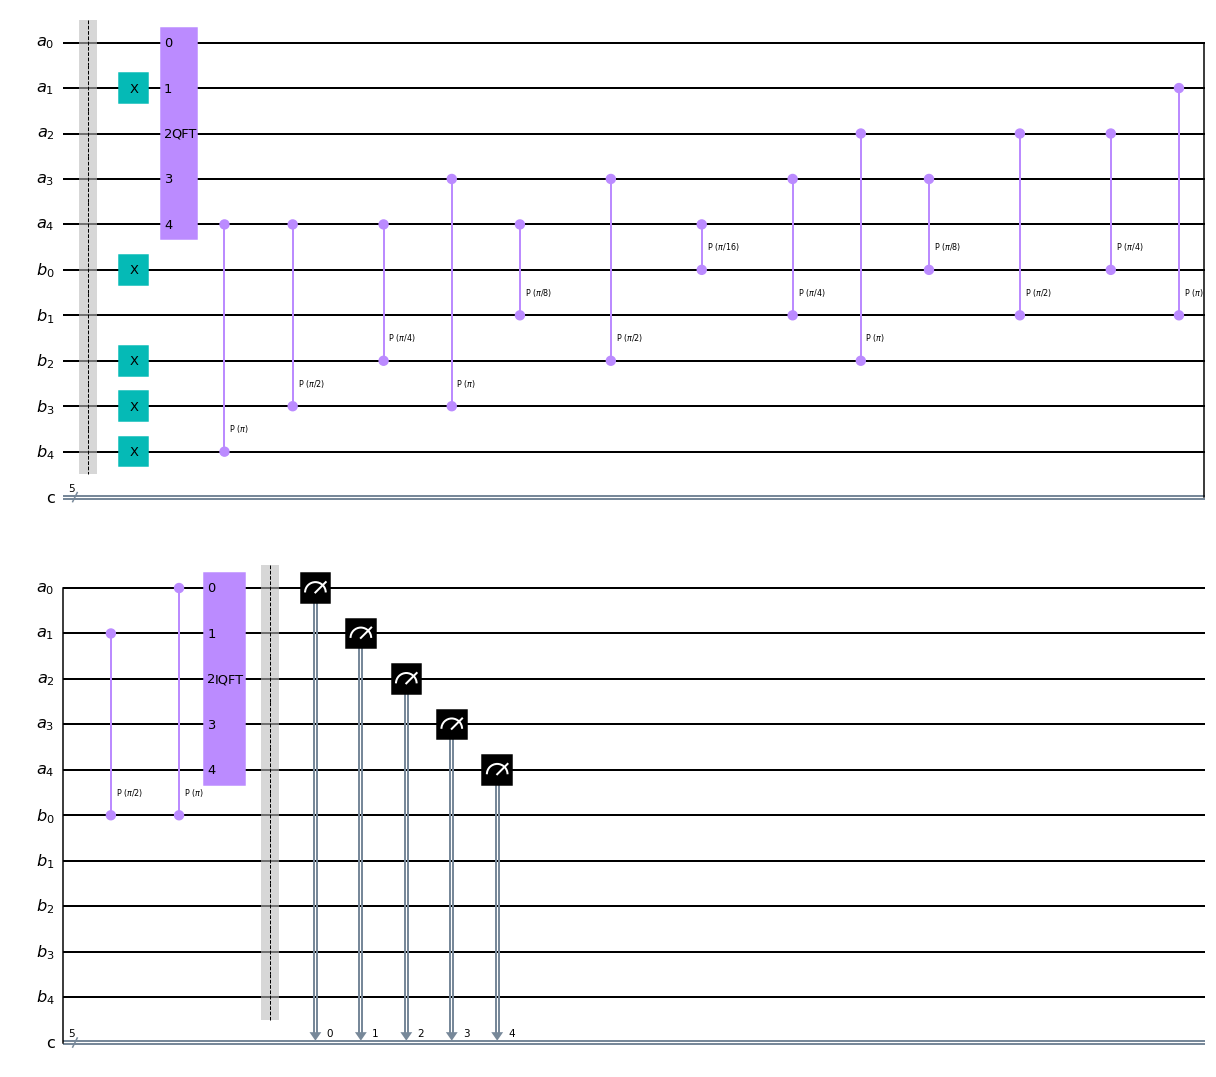

In [13]:
# Measure the qubits and transfer the values measured to the classical register
qc.measure(qReg_a, cReg)

# Display the circuit created so far
qc.draw()

## Running the circuit on the simulator

In [14]:
# Setting the quantum  simulator to be 'qasm_simulator'
backend = Aer.get_backend('qasm_simulator')

# Assemble our circuit on the simulator and execute for about 1024 times
job = execute(qc, backend, shots=1024) 

# Extract the sumulation result as a dictionary
result = job.result()
counts = result.get_counts(qc)
counts

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'11111': 1024}

## Inference

According to our algorithm, if the leading bit of the binary addition is **'1'**, the first number is the largest. If the leading bit of the binary addition is **'0'**, the second number is the largest.

In [15]:
# Extracting out the leading bit
l_bit = list(counts.keys())[0][0]
    
if l_bit=='1':
    print(f'{int_1} is the larger than {int_2}')
else :
    print(f'{int_2} is the larger than {int_1}')

2 is the larger than -3


## Arranging all the blocks together to a function

In [16]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

def controlled_rotations(qc, qra, qrb, k) :
    '''
    This function performs controlled rotations by connecting kth qubit of the first quantum regsiter 
    to the first k qubits of the second register, by means of a controlled-phase gate, which will change the base phase
    to multiples of pi/2 based on the iteration
    
    args :
    
    qc -> QuantumCircuit object
    qra -> QuantumRegister Object
    qrb -> QuantumRegister Object
    k  -> int
    
    return :
    
        None
    '''
    for i in range(0, k+1):
        # change the base phase by ith multiple of pi/2 if the control qubit from regB is 1
        qc.cp(np.pi/2**i, qrb[k-i], qra[k]) 
        
    

def twos_complement(number, num_bits):
    '''
    
    This function returns the two's complement binary string representation of the first input argument.
    For positive integers, it would return the direct binary representation
    
    args :
    
    number(int) -> This is the input integer for which the binary representation has to be found
    
    num_bits(int) -> Number of bits the return binary should be in
    
    return:
    
    binary(string) -> BInary equivalent of the input number of length num_bits
    '''
    
    if number >= 0: # Checks if the number is positive
        binary = format(number, f'0{num_bits}b')
    else: 
        # Compute the absolute value of num and subtract it from 2^bits
        abs_num = abs(number)
        complement = (1 << num_bits) - abs_num
        binary = format(complement, f'0{num_bits}b')

    return binary


def find_the_largest_number(number_1, number_2):
    
    '''
    
    This function uses quantum algorithm such as Quantum Fourier Transform (QFT) to perform binary addition
    and determines the largest of the two integer inputs provided in the argument
    
    args :
    
        number_1(int) -> This is one among the two integers, for which the largest one should be found 
        number_2(int) -> This is one among the two integers, for which the largest one should be found
        
    return :
        
        number_1 or number_2 (int)
    '''
    
    # Determine the number of qubits/bits needed for the register
    n = max(len(bin(number_1)), len(bin(number_2)))
    
    
    # Finding the two's complement binary for the two input integers    
    bin_num1 = twos_complement((-1)*number_1, n)
    bin_num2 = twos_complement(number_2, n)

    
    # Declare two quantum registers to hold the input data
    qReg_a = QuantumRegister(n, 'a')
    qReg_b = QuantumRegister(n, 'b')
    
    # Declare a quantum register to hold the output data
    cReg = ClassicalRegister(n, 'c')
    
    # Defining a quantum circuit with the registers created
    qc = QuantumCircuit(qReg_a, qReg_b, cReg)
    
    # Introducing a graphical bariier in the circuit to mark the start of computation
    qc.barrier()

    # Now let us encode the input bits into the corresponding register
    for index in range(n):
        
        rev_index = n - index - 1 # Iterating the index backwards
    
        # Place an X gate in the corresponding (n-index)th qubit if the corresponding nth bit is 1 
        if (bin_num1[index]=='1'):
            qc.x(qReg_a[rev_index])
        
        if (bin_num2[index]=='1'):
            qc.x(qReg_b[rev_index])
    
    
    # Adding a QFT block across all the qubits of the first quantum register
    qc.append(QFT(n, do_swaps=False), [i for i in range(n)])
    
    for i in range(n):
        # This function will add C-Phase gate on all of the qubits of qReg_a    
        controlled_rotations(qc, qReg_a, qReg_b, n-i-1 )

    # Adding an inverse QFT block across all the qubits of the first quantum register        
    qc.append(QFT(n, do_swaps=False).inverse(), [i for i in range(n)])

    # Adding a graphical barrier to show the end of circuit manipulation
    qc.barrier()
    
    # Measure the qubits and run the circuit on the simulator
    qc.measure(qReg_a, cReg)

    # Dispaly the circuit created 
    print(qc.draw())
    
    # Setting the quantum  simulator to be 'qasm_simulator'
    backend = Aer.get_backend('qasm_simulator')

    # Assemble our circuit on the simulator and execute for about 1024 times
    job = execute(qc, backend, shots=1024) 

    # Extract the sumulation result as a dictionary
    result = job.result()
    counts = result.get_counts(qc)
    
    # Extracting out the leading bit
    l_bit = list(counts.keys())[0][0]
    
    if l_bit=='1':
        return number_1
    else :
        return number_2

## Testing out the function

In [17]:
print(find_the_largest_number(-5,9))

Figure(1591.74x1649.48)
9


In [18]:
print(find_the_largest_number(-785,989))

Figure(1604.87x13448.7)
989


In [19]:
print(find_the_largest_number(8705684,87599))

Figure(1605.01x100739)
8705684


In [20]:
print(find_the_largest_number(-1875875,8))

Figure(1605.01x78223.9)
8


## Reflection

Eventhough, this algorithm seems to work well for all sorts of inputs. This cannot be used in a real quantum computer. Because, this algorithm utilizes the number of qubits directly proportional to the size of the inputs used. Till today, the quantum computer with the highest number of qubits made, is ***IBM Osprey***, which is a 433-qubit processor. If our input exceeds using 433 qubits, it becomes practically unusable in any of the quantum computers built so far. Moreover, the time-complexity of this algorithm is **O(n)**, which should not be the case for any real-use case algorithms.

I am thinking of a more efficient algorithm to do the same task. If I succeed in implementing such a algo within the deadline for task submission. I will update the files in the same repository.
